In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer



In [3]:
# Load the dataset
file_path = r"/content/socialmedia.csv"  # Update to your file path if necessary
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print(data.head())
except Exception as e:
    print(f"An error occurred: {e}")


Dataset loaded successfully!
   User ID          Username   Platform  Post ID  \
0      101  @adventureSeeker  Instagram    82036   
1      215   @foodieTraveler    Twitter    12463   
2      303  @wellnessJourney   Facebook    45982   
3      404     @fitnessFreak  Instagram    16572   
4      521     @foodExplorer    Twitter    75589   

                                           Post Text    Post Timestamp  \
0  "Experiencing the thrill of a lifetime! #Adven...  30-07-2023 14:45   
1    "Indulging in local delicacies! #FoodieTravels"  30-07-2023 19:30   
2              "Finding peace and balance in nature!  30-07-2023 08:15   
3                     "Pushing my limits in the gym!  30-07-2023 12:30   
4      "Discovering unique flavors around the world!  30-07-2023 16:20   

   Likes/Reactions  Comments  Shares/Retweets          Hashtags  ...  \
0             1500       250              120    #AdventureTime  ...   
1              850        70               50    #FoodieTravels  ... 

In [4]:
# Preprocessing text data
# Selecting only the 'Post Text' column for clustering
text_data = data['Post Text'].astype(str)

# Vectorizing the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
text_vectors = vectorizer.fit_transform(text_data)

print(f"TF-IDF Matrix Shape: {text_vectors.shape}")
print("Sample feature names:", vectorizer.get_feature_names_out()[:10])


TF-IDF Matrix Shape: (39, 104)
Sample feature names: ['adventure' 'adventuretime' 'art' 'balance' 'beauty' 'bite' 'blockbuster'
 'books' 'boundaries' 'canvas']


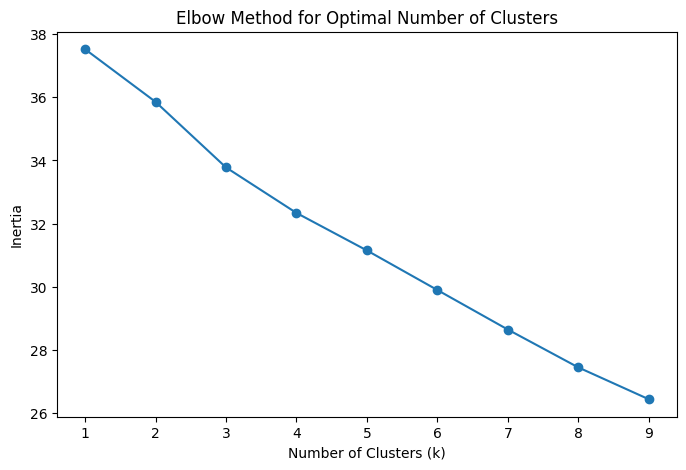

In [5]:
# Determining the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 10)  # Testing cluster numbers from 1 to 9

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(text_vectors)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [6]:
# Applying K-Means clustering with 5 clusters
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(text_vectors)

# Adding the cluster labels to the original dataset
data['Cluster'] = clusters

# Displaying the first few rows with the cluster labels
print(data[['Post Text', 'Cluster']].head())

# Save the clustered dataset for analysis if needed
output_path = r"C:\cse445pro\clustered_socialmedia.csv"
data.to_csv(output_path, index=False)
print(f"Clustered dataset saved to: {output_path}")


                                           Post Text  Cluster
0  "Experiencing the thrill of a lifetime! #Adven...        3
1    "Indulging in local delicacies! #FoodieTravels"        3
2              "Finding peace and balance in nature!        2
3                     "Pushing my limits in the gym!        3
4      "Discovering unique flavors around the world!        1
Clustered dataset saved to: C:\cse445pro\clustered_socialmedia.csv


In [7]:
# Analyzing and visualizing top keywords for each cluster
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Extracting the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Getting cluster centers
cluster_centers = kmeans.cluster_centers_

# Displaying top 5 keywords for each cluster
print("Top Keywords for Each Cluster:")
for cluster_idx in range(optimal_clusters):
    top_keywords_idx = cluster_centers[cluster_idx].argsort()[-5:][::-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    print(f"Cluster {cluster_idx}: {', '.join(top_keywords)}")


Top Keywords for Each Cluster:
Cluster 0: latest, geeking, reviewing, gadgets, blockbuster
Cluster 1: world, discovering, leveling, gaming, city
Cluster 2: nature, beauty, finding, embracing, immersed
Cluster 3: art, secrets, technology, creativity, style
Cluster 4: giving, voice, voiceless, second, chance


<ipython-input-8-10af29c0253f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


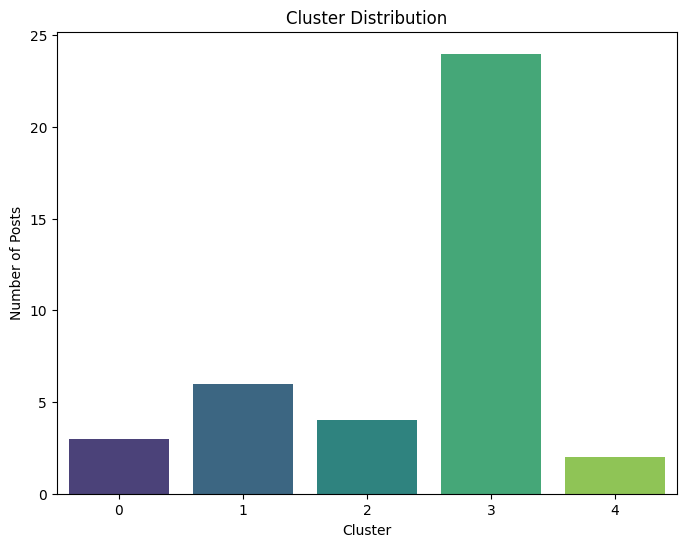

In [8]:
# Visualizing the cluster distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Counting the number of posts in each cluster
cluster_counts = data['Cluster'].value_counts().sort_index()

# Creating a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Posts')
plt.xticks(range(optimal_clusters))
plt.show()


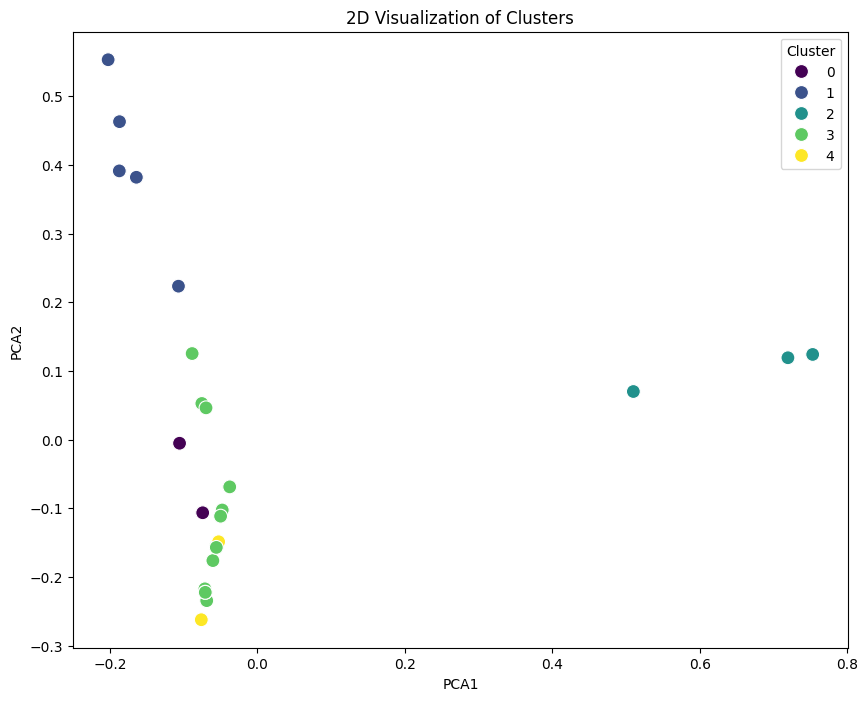

In [9]:
from sklearn.decomposition import PCA

# Reducing dimensions to 2D for visualization
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(text_vectors.toarray())

# Adding the reduced dimensions to the dataset
data['PCA1'] = reduced_data[:, 0]
data['PCA2'] = reduced_data[:, 1]

# Plotting the clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('2D Visualization of Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster', loc='best')
plt.show()


In [10]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(text_vectors, clusters)

print(f"Silhouette Score for K-Means Clustering with {optimal_clusters} clusters: {silhouette_avg:.2f}")


Silhouette Score for K-Means Clustering with 5 clusters: 0.05


In [11]:
# Experimenting with different numbers of clusters
for k in range(2, 7):  # Test from 2 to 6 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(text_vectors)
    score = silhouette_score(text_vectors, cluster_labels)
    print(f"Silhouette Score for {k} clusters: {score:.2f}")


Silhouette Score for 2 clusters: 0.02
Silhouette Score for 3 clusters: 0.04
Silhouette Score for 4 clusters: 0.05
Silhouette Score for 5 clusters: 0.05
Silhouette Score for 6 clusters: 0.06


In [12]:
# Reducing dimensions with PCA
pca = PCA(n_components=2, random_state=42)
reduced_vectors = pca.fit_transform(text_vectors.toarray())

# Apply K-Means again
kmeans_pca = KMeans(n_clusters=5, random_state=42)
clusters_pca = kmeans_pca.fit_predict(reduced_vectors)

# Calculate Silhouette Score for PCA-reduced data
silhouette_pca = silhouette_score(reduced_vectors, clusters_pca)
print(f"Silhouette Score after PCA: {silhouette_pca:.2f}")


Silhouette Score after PCA: 0.65


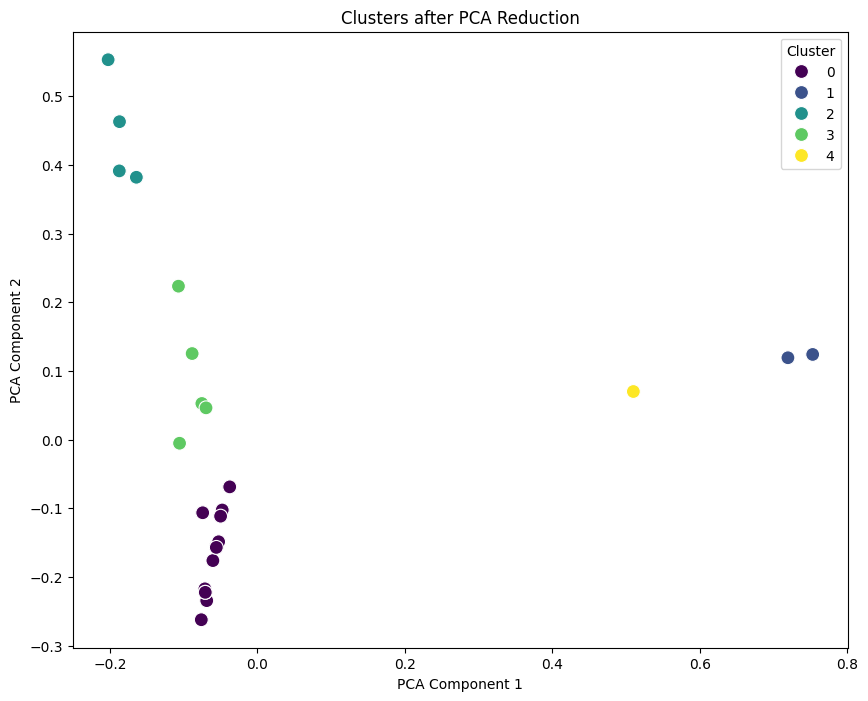

In [13]:
# Visualizing clusters after PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_vectors[:, 0], y=reduced_vectors[:, 1], hue=clusters_pca, palette='viridis', s=100)
plt.title('Clusters after PCA Reduction')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()
